
# Exports

# Experiments:

In [1]:
%load_ext autotime
%matplotlib inline

time: 295 ms (started: 2024-04-29 17:43:04 +03:00)


In [2]:
import pandas as pd
import joblib
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import re

time: 667 ms (started: 2024-04-29 17:43:06 +03:00)


In [3]:
# Reading the data
data =  pd.read_csv('../../Data/SimpleApproach/Exports/Exports16-2021.csv.gz', compression='gzip')
data

,refYear,reporterCode,partnerCode,distw_harmonic,contig,gdp_o,gdp_d,gdpcap_o,gdpcap_d,pop_o,...,primaryValue_y,diversity,ubiquity,mcp,eci,pci,density,coi,cog,rca
0,2016,12.0,4.0,5758.0,0.0,1.560796e+08,1.946902e+07,3.844,0.562,40606.052,...,8.306141e+05,52,23,0,-0.560928,1.670182,0.009508,-0.986485,0.328780,0.092705
1,2016,12.0,8.0,1511.0,0.0,1.560796e+08,1.192689e+07,3.844,4.147,40606.052,...,2.090634e+08,52,42,1,-0.560928,-2.597045,0.016871,-0.986485,-0.000000,9.458043
2,2016,12.0,8.0,1511.0,0.0,1.560796e+08,1.192689e+07,3.844,4.147,40606.052,...,2.090634e+08,52,42,1,-0.560928,-2.597045,0.016871,-0.986485,-0.000000,9.458043
3,2016,12.0,8.0,1511.0,0.0,1.560796e+08,1.192689e+07,3.844,4.147,40606.052,...,2.090634e+08,52,42,1,-0.560928,-2.597045,0.016871,-0.986485,-0.000000,9.458043
4,2016,12.0,8.0,1511.0,0.0,1.560796e+08,1.192689e+07,3.844,4.147,40606.052,...,2.090634e+08,52,42,1,-0.560928,-2.597045,0.016871,-0.986485,-0.000000,9.458043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256300072,2021,894.0,842.0,13549.0,0.0,2.120306e+07,2.299610e+10,1.121,69.288,18920.656,...,1.165392e+03,159,13,0,-0.706759,-0.163885,0.033542,-0.832140,0.244567,0.018798
256300073,2021,894.0,842.0,13549.0,0.0,2.120306e+07,2.299610e+10,1.121,69.288,18920.656,...,1.149125e+05,159,14,0,-0.706759,0.250835,0.023356,-0.832140,0.280534,0.292447
256300074,2021,894.0,842.0,13549.0,0.0,2.120306e+07,2.299610e+10,1.121,69.288,18920.656,...,5.882079e+03,159,19,0,-0.706759,-1.079805,0.036466,-0.832140,-0.217961,0.946455
256300075,2021,894.0,842.0,13549.0,0.0,2.120306e+07,2.299610e+10,1.121,69.288,18920.656,...,8.121207e+04,159,12,1,-0.706759,2.719383,0.042198,-0.832140,0.000000,1.207172


time: 6min 34s (started: 2024-04-29 17:43:08 +03:00)


In [4]:
data = data.rename(columns={'primaryValue_x': 'primaryValue'})
data.dropna(inplace=True)

time: 13.5 s (started: 2024-04-29 17:49:42 +03:00)


In [5]:
def MPE(Y_actual,Y_Predicted):
    mape = np.mean((Y_actual - Y_Predicted)/Y_actual)*100
    return mape

def MAPE(Y_actual,Y_Predicted):
    mpe = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mpe

data['primaryValue'] = data['primaryValue']/1000000
data['gdp_o'] = data['gdp_o']/1000000
data['gdp_d'] = data['gdp_d']/1000000
data['gdpcap_o'] = data['gdpcap_o']/1000000
data['gdpcap_d'] = data['gdpcap_d']/1000000
data['distw_harmonic'] = data['distw_harmonic']/1000

time: 2.39 s (started: 2024-04-29 17:49:56 +03:00)


## RF


In [6]:
X = data[[ 'distw_harmonic', 'gdp_o', 'gdp_d', 'refMonth', 'cmdCode']]
y = data['primaryValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
del X, y


# RF
reg = model = RandomForestRegressor(min_samples_split=10, n_estimators=25, n_jobs=-1, random_state=0, oob_score=True,criterion='poisson', max_depth=17, verbose=0, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

/Users/chouno/Etag/myenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


R2 on training data: 0.76
R2 on validation data: 0.72
OOB Score (R-squared): 0.71
Mean Squared Error: 21.05
Mean Absolute Error: 0.39
Adjusted R^2 Score: 0.72
MAPE:  298891.0108133603
MPE:  -298875.0428820473
time: 24min 4s (started: 2024-04-29 17:49:58 +03:00)


Feature Importances:
 distw_harmonic    0.121
gdp_o             0.121
gdp_d             0.225
refMonth          0.004
cmdCode           0.528
dtype: float64


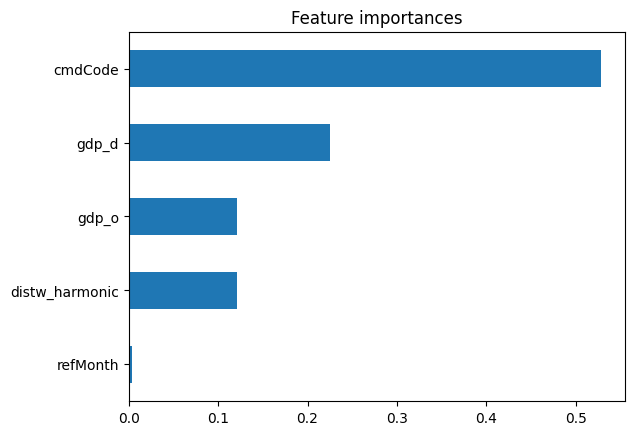

time: 117 ms (started: 2024-04-29 18:14:02 +03:00)


In [7]:
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

In [8]:
X = data[['distw_harmonic', 'pop_o', 'pop_d', 'gdpcap_o','gdpcap_d', 'refMonth', 'cmdCode']]
y = data['primaryValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
del X, y

# RF
reg = model = RandomForestRegressor(min_samples_split=10,oob_score=True, n_estimators=25, n_jobs=-1, random_state=0, criterion='poisson', max_depth=17, verbose=0, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

/Users/chouno/Etag/myenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


R2 on training data: 0.77
R2 on validation data: 0.73
OOB Score (R-squared): 0.71
Mean Squared Error: 20.91
Mean Absolute Error: 0.39
Adjusted R^2 Score: 0.73
MAPE:  282149.05984302785
MPE:  -282133.21297113376
time: 27min (started: 2024-04-29 18:14:03 +03:00)


Feature Importances:
 distw_harmonic    0.103
pop_o             0.108
pop_d             0.172
gdpcap_o          0.042
gdpcap_d          0.058
refMonth          0.005
cmdCode           0.511
dtype: float64


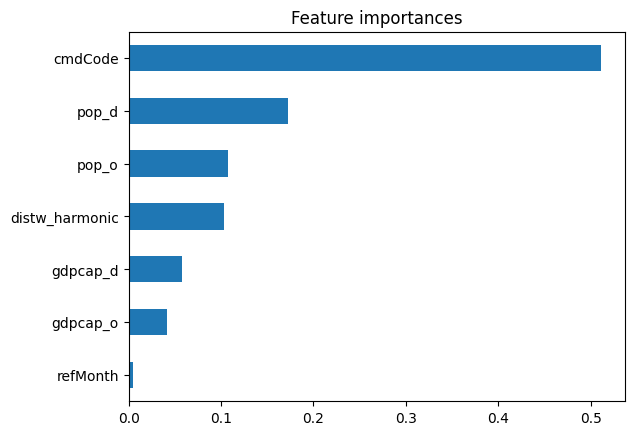

time: 79.1 ms (started: 2024-04-29 18:41:03 +03:00)


In [9]:
# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

/Users/chouno/Etag/myenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


R2 on training data: 0.8
R2 on validation data: 0.77
OOB Score (R-squared): 0.75
Mean Squared Error: 17.76
Mean Absolute Error: 0.37
Adjusted R^2 Score: 0.77
MAPE:  251932.36047844702
MPE:  -251916.85617748363
Feature Importances:
 distw_harmonic    0.099
pop_o             0.075
pop_d             0.165
gdpcap_o          0.040
gdpcap_d          0.058
refMonth          0.003
cmdCode           0.394
density           0.166
dtype: float64


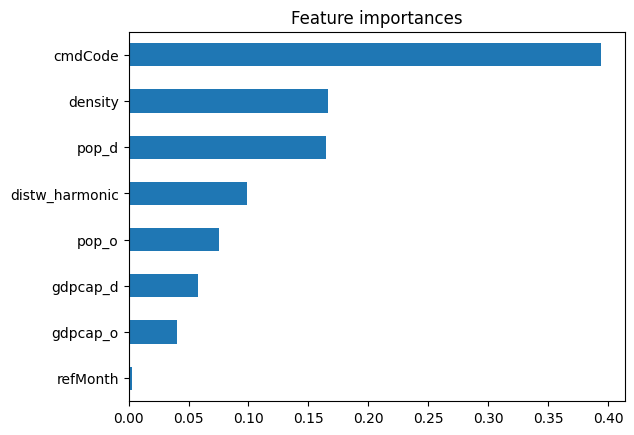

time: 32min 22s (started: 2024-04-29 18:41:03 +03:00)


In [10]:
X = data[['distw_harmonic', 'pop_o', 'pop_d', 'gdpcap_o','gdpcap_d', 'refMonth', 'cmdCode','density']]
y = data['primaryValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
del X, y

# RF
reg = model = RandomForestRegressor(min_samples_split=10,oob_score=True, n_estimators=25, n_jobs=-1, random_state=0, criterion='poisson', max_depth=17, verbose=0, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)


r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()

/Users/chouno/Etag/myenv/lib/python3.10/site-packages/sklearn/ensemble/_forest.py:583: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


R2 on training data: 0.81
R2 on validation data: 0.78
OOB Score (R-squared): 0.76
Mean Squared Error: 17.2
Mean Absolute Error: 0.36
Adjusted R^2 Score: 0.78
MAPE:  244429.5580929538
MPE:  -244414.01519776118
Feature Importances:
 distw_harmonic    0.097
pop_o             0.069
pop_d             0.162
gdpcap_o          0.040
gdpcap_d          0.059
refMonth          0.003
cmdCode           0.362
density           0.144
pci               0.063
dtype: float64


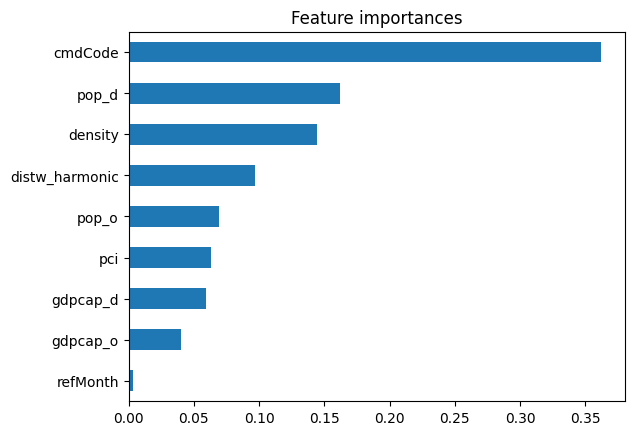

time: 37min 18s (started: 2024-04-29 19:13:25 +03:00)


In [11]:
X = data[['distw_harmonic', 'pop_o', 'pop_d', 'gdpcap_o','gdpcap_d', 'refMonth', 'cmdCode','density', 'pci']]
y = data['primaryValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
del X, y

# RF
reg = model = RandomForestRegressor(min_samples_split=10,oob_score=True, n_estimators=25, n_jobs=-1, random_state=0, criterion='poisson', max_depth=17, verbose=0, max_features = 0.7)
reg = reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)



r2_train = reg.score(X_train, y_train)
r2_val = reg.score(X_test, y_test)
print("R2 on training data:", r2_train.round(2))
print("R2 on validation data:", r2_val.round(2))
oob_score = reg.oob_score_
print("OOB Score (R-squared):", oob_score.round(2))

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_val, y_pred)
adj_r2 = 1 - (1-r2_score(y_test, y_pred)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

print("Mean Squared Error:", mse.round(2))
print("Mean Absolute Error:", mae.round(2))
# print("R^2 Score:", r2.round(2))
print("Adjusted R^2 Score:", adj_r2.round(2))

index = y_test!=0
mape = MAPE(y_test[index], y_pred[index])
mpe = MPE(y_test[index], y_pred[index])


print('MAPE: ', mape)
print('MPE: ', mpe)

# Printing the feature importances
importances = pd.Series(model.feature_importances_.round(3), index=X_train.columns)
print('Feature Importances:\n', importances)
#
importances.sort_values().plot(kind='barh')
plt.title('Feature importances')
plt.show()